In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [334]:
lc_data =  pd.read_csv('https://raw.githubusercontent.com/cjflanagan/cs68/master/lending_club_training_data_subset.csv')

In [335]:
lc_data.head(11)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,65230,92451797,NaN,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,100xx,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,NaN,6.0,0.0,204.0,2.8%,14.0,w,0.0,...,0.0,18914.0,6155.0,7300.0,11614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36521,94187830,NaN,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,786xx,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,NaN,11.0,0.0,12855.0,59.2%,18.0,w,0.0,...,0.0,52683.0,38686.0,15000.0,30983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,25712,93882482,NaN,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,557xx,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,...,0.0,56789.0,62872.0,17800.0,38489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,92973,91238602,NaN,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,224xx,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,NaN,10.0,0.0,6771.0,44%,32.0,f,0.0,...,0.0,42402.0,26059.0,7300.0,27002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,16335,94465406,NaN,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,322xx,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,78.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,...,0.0,54722.0,50339.0,300.0,50522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,64054,92807532,NaN,14000.0,14000.0,14000.0,36 months,8.24%,440.27,B,B1,Administrative Analyst,10+ years,MORTGAGE,85000.0,Source Verified,Nov-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,925xx,CA,23.21,1.0,Jul-2005,705.0,709.0,0.0,22.0,NaN,16.0,0.0,25092.0,53.8%,

In [336]:
lc_data.shape

(20000, 151)

In [337]:
lc_data=lc_data.drop(columns=['Unnamed: 0', 'member_id','id','url', 'policy_code','zip_code'], axis=1)
lc_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,Project Accountant,3 years,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,NaN,debt_consolidation,Debt consolidation,NY,1.75,2.0,Sep-2007,675.0,679.0,1.0,11.0,NaN,6.0,0.0,204.0,2.8%,14.0,w,0.0,0.0,22329.530000,22329.53,9704.73,10188.98,...,0.0,18914.0,6155.0,7300.0,11614.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,Sr Business Analyst,4 years,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,TX,11.48,0.0,Aug-2008,680.0,684.0,0.0,33.0,NaN,11.0,0.0,12855.0,59.2%,18.0,w,0.0,0.0,12458.596524,12458.60,12000.00,458.60,...,0.0,52683.0,38686.0,15000.0,30983.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,Maintenance,3 years,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,NaN,other,Other,MN,10.76,0.0,Feb-1999,695.0,699.0,0.0,NaN,NaN,13.0,0.0,18157.0,99.2%,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,0.60,...,0.0,56789.0,62872.0,17800.0,38489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,NaN,NaN,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,NaN,credit_card,Credit card refinancing,VA,20.43,0.0,May-2005,680.0,684.0,0.0,51.0,NaN,10.0,0.0,6771.0,44%,32.0,f,0.0,0.0,11778.122232,11778.12,10000.00,1778.12,...,0.0,42402.0,26059.0,7300.0,27002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,Forman,5 years,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,NaN,other,Other,FL,23.76,0.0,Feb-2012,660.0,664.0,1.0,28.0,78.0,7.0,1.0,2483.0,59.1%,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,2034.57,...,0.0,54722.0,50339.0,300.0,50522.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
lc_data.dropna(axis=1, inplace=True)
lc_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,...,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,26450.0,26450.0,26450.0,60 months,18.99%,685.99,D,D3,RENT,63000.0,Not Verified,Nov-2016,Charged Off,n,debt_consolidation,NY,2.0,Sep-2007,675.0,679.0,1.0,6.0,0.0,204.0,14.0,w,0.0,0.0,22329.530000,22329.53,9704.73,10188.98,0.0,2435.82,438.4476,1371.98,Oct-2019,544.0,540.0,0.0,...,2.0,1.0,1.0,5951.0,2.0,2.0,133.0,7300.0,1.0,0.0,2.0,3.0,1026.0,0.0,0.0,110.0,6.0,5.0,0.0,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,1.0,3.0,66.7,0.0,0.0,18914.0,6155.0,7300.0,11614.0,N
1,12000.0,12000.0,12000.0,36 months,11.44%,395.37,B,B4,RENT,85000.0,Source Verified,Nov-2016,Fully Paid,n,debt_consolidation,TX,0.0,Aug-2008,680.0,684.0,0.0,11.0,0.0,12855.0,18.0,w,0.0,0.0,12458.596524,12458.60,12000.00,458.60,0.0,0.00,0.0000,11280.12,Feb-2020,754.0,750.0,0.0,...,1.0,0.0,1.0,25831.0,3.0,4.0,3753.0,21700.0,0.0,7.0,0.0,5.0,3869.0,0.0,0.0,99.0,5.0,5.0,0.0,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,3.0,88.9,0.0,0.0,52683.0,38686.0,15000.0,30983.0,N
2,1000.0,1000.0,1000.0,36 months,15.99%,35.16,C,C5,RENT,90000.0,Source Verified,Dec-2016,Fully Paid,n,other,MN,0.0,Feb-1999,695.0,699.0,0.0,13.0,0.0,18157.0,27.0,w,0.0,0.0,1000.600733,1000.60,1000.00,0.60,0.0,0.00,0.0000,1002.38,Jun-2020,664.0,660.0,0.0,...,3.0,1.0,1.0,44715.0,0.0,1.0,5980.0,18300.0,0.0,2.0,0.0,2.0,4836.0,0.0,0.0,213.0,23.0,10.0,0.0,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0,N
3,10000.0,10000.0,10000.0,36 months,10.99%,327.34,B,B4,RENT,40000.0,Verified,Oct-2016,Fully Paid,n,credit_card,VA,0.0,May-2005,680.0,684.0,0.0,10.0,0.0,6771.0,32.0,f,0.0,0.0,11778.122232,11778.12,10000.00,1778.12,0.0,0.00,0.0000,327.33,Oct-2019,704.0,700.0,0.0,...,1.0,0.0,0.0,19288.0,2.0,5.0,2300.0,15400.0,1.0,1.0,0.0,5.0,2895.0,0.0,0.0,122.0,4.0,4.0,2.0,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,2.0,93.5,0.0,0.0,42402.0,26059.0,7300.0,27002.0,N
4,4500.0,4500.0,4500.0,36 months,26.24%,181.89,E,E5,RENT,30000.0,Verified,Dec-2016,Fully Paid,n,other,FL,0.0,Feb-2012,660.0,664.0,1.0,7.0,1.0,2483.0,7.0,f,0.0,0.0,6534.574960,6534.57,4500.00,2034.57,0.0,0.00,0.0000,181.54,Nov-2019,704.0,700.0,0.0,...,3.0,0.0,1.0,47856.0,1.0,3.0,236.0,4200.0,0.0,3.0,1.0,4.0,7191.0,0.0,0.0,31.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,1.0,85.7,0.0,0.0,54722.0,50339.0,300.0,50522.0,N


In [339]:
lc_data.int_rate = lc_data.int_rate.str.rstrip('%').astype('float') / 100.0
lc_data.int_rate

0        0.1899
1        0.1144
2        0.1599
3        0.1099
4        0.2624
          ...  
19995    0.2749
19996    0.1599
19997    0.2149
19998    0.1499
19999    0.1599
Name: int_rate, Length: 20000, dtype: float64

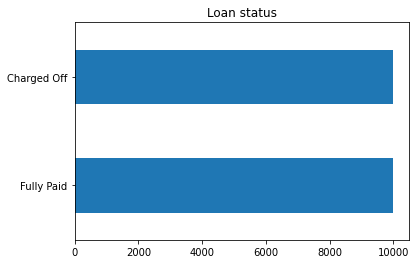

In [340]:
lc_data.loan_status.value_counts().plot(kind='barh', title='Loan status')
plt.show() 

In [341]:
lc_data.loan_status = lc_data.loan_status.replace({'Charged Off':1, 'Fully Paid':0})
y = lc_data.pop('loan_status')

In [342]:
numerical_columns = lc_data.select_dtypes(include=np.number)
numerical_columns


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,open_rv_12m,open_rv_24m,max_bal_bc,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,26450.0,26450.0,26450.0,0.1899,685.99,63000.0,2.0,675.0,679.0,1.0,6.0,0.0,204.0,14.0,0.0,0.0,22329.530000,22329.53,9704.73,10188.98,0.0,2435.82,438.4476,1371.98,544.0,540.0,0.0,0.0,0.0,6155.0,2.0,2.0,1.0,1.0,5951.0,2.0,2.0,133.0,7300.0,1.0,0.0,2.0,3.0,1026.0,0.0,0.0,110.0,6.0,5.0,0.0,0.0,2.0,2.0,4.0,6.0,6.0,4.0,7.0,2.0,6.0,0.0,1.0,3.0,66.7,0.0,0.0,18914.0,6155.0,7300.0,11614.0
1,12000.0,12000.0,12000.0,0.1144,395.37,85000.0,0.0,680.0,684.0,0.0,11.0,0.0,12855.0,18.0,0.0,0.0,12458.596524,12458.60,12000.00,458.60,0.0,0.00,0.0000,11280.12,754.0,750.0,0.0,0.0,0.0,38686.0,2.0,1.0,0.0,1.0,25831.0,3.0,4.0,3753.0,21700.0,0.0,7.0,0.0,5.0,3869.0,0.0,0.0,99.0,5.0,5.0,0.0,1.0,4.0,6.0,5.0,6.0,2.0,10.0,16.0,6.0,11.0,0.0,0.0,3.0,88.9,0.0,0.0,52683.0,38686.0,15000.0,30983.0
2,1000.0,1000.0,1000.0,0.1599,35.16,90000.0,0.0,695.0,699.0,0.0,13.0,0.0,18157.0,27.0,0.0,0.0,1000.600733,1000.60,1000.00,0.60,0.0,0.00,0.0000,1002.38,664.0,660.0,0.0,0.0,0.0,62872.0,0.0,3.0,1.0,1.0,44715.0,0.0,1.0,5980.0,18300.0,0.0,2.0,0.0,2.0,4836.0,0.0,0.0,213.0,23.0,10.0,0.0,0.0,8.0,8.0,8.0,10.0,16.0,9.0,11.0,9.0,13.0,0.0,0.0,1.0,100.0,0.0,0.0,56789.0,62872.0,17800.0,38489.0
3,10000.0,10000.0,10000.0,0.1099,327.34,40000.0,0.0,680.0,684.0,0.0,10.0,0.0,6771.0,32.0,0.0,0.0,11778.122232,11778.12,10000.00,1778.12,0.0,0.00,0.0000,327.33,704.0,700.0,0.0,0.0,0.0,26059.0,1.0,1.0,0.0,0.0,19288.0,2.0,5.0,2300.0,15400.0,1.0,1.0,0.0,5.0,2895.0,0.0,0.0,122.0,4.0,4.0,2.0,0.0,4.0,5.0,5.0,10.0,14.0,9.0,15.0,5.0,10.0,0.0,0.0,2.0,93.5,0.0,0.0,42402.0,26059.0,7300.0,27002.0
4,4500.0,4500.0,4500.0,0.2624,181.89,30000.0,0.0,660.0,664.0,1.0,7.0,1.0,2483.0,7.0,0.0,0.0,6534.574960,6534.57,4500.00,2034.57,0.0,0.00,0.0000,181.54,704.0,700.0,0.0,0.0,575.0,50339.0,1.0,3.0,0.0,1.0,47856.0,1.0,3.0,236.0,4200.0,0.0,3.0,1.0,4.0,7191.0,0.0,0.0,31.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,3.0,4.0,4.0,4.0,7.0,0.0,0.0,1.0,85.7,0.0,0.0,54722.0,50339.0,300.0,50522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12000.0,12000.0,12000.0,0.2749,369.95,60000.0,0.0,670.0,674.0,2.0,13.0,0.0,16484.0,18.0,0.0,0.0,12682.360000,12682.36,4191.16,7288.41,0.0,1202.79,216.5022,369.95,529.0,525.0,0.0,0.0,0.0,86974.0,2.0,2.0,0.0,1.0,68481.0,2.0,2.0,5074.0,42700.0,0.0,0.0,2.0,3.0,6690.0,0.0,0.0,185.0,2.0,2.0,0.0,1.0,9.0,10.0,9.0,12.0,4.0,10.0,13.0,10.0,13.0,0.0,0.0,2.0,94.4,0.0,0.0,92905.0,86974.0,41300.0,48196.0
19996,7300.0,7300.0,7300.0,0.1599,256.62,80000.0,0.0,675.0,679.0,0.0,5.0,0.0,4072.0,13.0,0.0,0.0,8891.944057,8891.94,7300.00,1591.94,0.0,0.00,0.0000,3766.02,649.0,645.0,0.0,0.0,0.0,387275.0,1.0,1.0,0.0,0.0,16050.0,1.0,1.0,0.0,4400.0,0.0,0.0,0.0,1.0,77455.0,0.0,0.0,146.0,2.0,2.0,4.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,6.0,3.0,5.0,0.0,0.0,1.0,84.6,0.0,0.0,429038.0,20122.0,0.0,28324.0
1999

In [343]:
categorical_cols = lc_data.select_dtypes(exclude=np.number)

categorical_cols

,term,grade,sub_grade,home_ownership,verification_status,issue_d,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type,debt_settlement_flag
0,60 months,D,D3,RENT,Not Verified,Nov-2016,n,debt_consolidation,NY,Sep-2007,w,Oct-2019,Individual,N
1,36 months,B,B4,RENT,Source Verified,Nov-2016,n,debt_consolidation,TX,Aug-2008,w,Feb-2020,Individual,N
2,36 months,C,C5,RENT,Source Verified,Dec-2016,n,other,MN,Feb-1999,w,Jun-2020,Individual,N
3,36 months,B,B4,RENT,Verified,Oct-2016,n,credit_card,VA,May-2005,f,Oct-2019,Individual,N
4,36 months,E,E5,RENT,Verified,Dec-2016,n,other,FL,Feb-2012,f,Nov-2019,Individual,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,60 months,F,F4,OWN,Source Verified,Oct-2016,n,debt_consolidation,TX,May-2001,w,Nov-2019,Individual,N
19996,36 months,C,C5,MORTGAGE,Source Verified,Oct-2016,n,home_improvement,CA,Sep-2003,w,Jun-2020,Individual,N
19997,60 months,D,D5,RENT,Verified,Nov-2016,n,debt_consolidation,CA,Sep-2004,f,Sep-2017,Individual,N
19998,60 months,C,C4,RENT,Verified,Oct-2016,n,debt_consolidation,MI,Nov-2002,f,Jul-2019,Individual,N


In [344]:
numerical_columns.int_rate.round(2).mean()

0.1431505000000114

In [345]:
#find which columns have a mean value of 0
zero_col = numerical_columns.mean(axis=0).round(2)==0.00
# extract these column labels and drop from numerical_columns
zero_col = zero_col[zero_col == True].index
numerical_columns = numerical_columns.drop(zero_col, axis=1)
numerical_columns.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_b

In [346]:
# Create dummy variables
categorical_cols = pd.get_dummies(data = categorical_cols, columns=categorical_cols.columns, drop_first=False)
lc_data_subset = categorical_cols

In [347]:
 merge_cols = list(categorical_cols.columns) + list(numerical_columns.columns)

In [348]:
categorical_cols.join(numerical_columns)

lc_data_subset

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,...,last_credit_pull_d_Dec-2018,last_credit_pull_d_Dec-2019,last_credit_pull_d_Feb-2017,last_credit_pull_d_Feb-2018,last_credit_pull_d_Feb-2019,last_credit_pull_d_Feb-2020,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jan-2018,last_credit_pull_d_Jan-2019,last_credit_pull_d_Jan-2020,last_credit_pull_d_Jul-2017,last_credit_pull_d_Jul-2018,last_credit_pull_d_Jul-2019,last_credit_pull_d_Jun-2017,last_credit_pull_d_Jun-2018,last_credit_pull_d_Jun-2019,last_credit_pull_d_Jun-2020,last_credit_pull_d_Mar-2017,last_credit_pull_d_Mar-2018,last_credit_pull_d_Mar-2019,last_credit_pull_d_Mar-2020,last_credit_pull_d_May-2017,last_credit_pull_d_May-2018,last_credit_pull_d_May-2019,last_credit_pull_d_May-2020,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Nov-2018,last_credit_pull_d_Nov-2019,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Oct-2018,last_credit_pull_d_Oct-2019,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,last_credit_pull_d_Sep-2019,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
19996,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
19997,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
19998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [349]:
categorical_cols


,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,...,last_credit_pull_d_Dec-2018,last_credit_pull_d_Dec-2019,last_credit_pull_d_Feb-2017,last_credit_pull_d_Feb-2018,last_credit_pull_d_Feb-2019,last_credit_pull_d_Feb-2020,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jan-2018,last_credit_pull_d_Jan-2019,last_credit_pull_d_Jan-2020,last_credit_pull_d_Jul-2017,last_credit_pull_d_Jul-2018,last_credit_pull_d_Jul-2019,last_credit_pull_d_Jun-2017,last_credit_pull_d_Jun-2018,last_credit_pull_d_Jun-2019,last_credit_pull_d_Jun-2020,last_credit_pull_d_Mar-2017,last_credit_pull_d_Mar-2018,last_credit_pull_d_Mar-2019,last_credit_pull_d_Mar-2020,last_credit_pull_d_May-2017,last_credit_pull_d_May-2018,last_credit_pull_d_May-2019,last_credit_pull_d_May-2020,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Nov-2018,last_credit_pull_d_Nov-2019,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Oct-2018,last_credit_pull_d_Oct-2019,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,last_credit_pull_d_Sep-2019,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
19996,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
19997,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
19998,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [350]:
X = lc_data_subset

# Splitting data

In [351]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.33)

In [352]:
print('Train fraction: {}'.format((X_train.shape[0]) / X.shape[0]))
print('Validation fraction: {}'.format((X_valid.shape[0]  / X.shape[0])))
print('Test fraction: {}'.format((X_test.shape[0]  / X.shape[0])))

Train fraction: 0.7
Validation fraction: 0.201
Test fraction: 0.099


In [353]:
X_train.head()

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,...,last_credit_pull_d_Dec-2018,last_credit_pull_d_Dec-2019,last_credit_pull_d_Feb-2017,last_credit_pull_d_Feb-2018,last_credit_pull_d_Feb-2019,last_credit_pull_d_Feb-2020,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jan-2018,last_credit_pull_d_Jan-2019,last_credit_pull_d_Jan-2020,last_credit_pull_d_Jul-2017,last_credit_pull_d_Jul-2018,last_credit_pull_d_Jul-2019,last_credit_pull_d_Jun-2017,last_credit_pull_d_Jun-2018,last_credit_pull_d_Jun-2019,last_credit_pull_d_Jun-2020,last_credit_pull_d_Mar-2017,last_credit_pull_d_Mar-2018,last_credit_pull_d_Mar-2019,last_credit_pull_d_Mar-2020,last_credit_pull_d_May-2017,last_credit_pull_d_May-2018,last_credit_pull_d_May-2019,last_credit_pull_d_May-2020,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Nov-2018,last_credit_pull_d_Nov-2019,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Oct-2018,last_credit_pull_d_Oct-2019,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,last_credit_pull_d_Sep-2019,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
3994,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
19821,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
14015,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
759,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
17347,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# Decision Tree

In [354]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3)

print(dt_model)

dt_model = dt_model.fit(X_train,y_train)
pred_dt = dt_model.predict_proba(X_valid)[:, 1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [355]:
X_train

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,...,last_credit_pull_d_Dec-2018,last_credit_pull_d_Dec-2019,last_credit_pull_d_Feb-2017,last_credit_pull_d_Feb-2018,last_credit_pull_d_Feb-2019,last_credit_pull_d_Feb-2020,last_credit_pull_d_Jan-2017,last_credit_pull_d_Jan-2018,last_credit_pull_d_Jan-2019,last_credit_pull_d_Jan-2020,last_credit_pull_d_Jul-2017,last_credit_pull_d_Jul-2018,last_credit_pull_d_Jul-2019,last_credit_pull_d_Jun-2017,last_credit_pull_d_Jun-2018,last_credit_pull_d_Jun-2019,last_credit_pull_d_Jun-2020,last_credit_pull_d_Mar-2017,last_credit_pull_d_Mar-2018,last_credit_pull_d_Mar-2019,last_credit_pull_d_Mar-2020,last_credit_pull_d_May-2017,last_credit_pull_d_May-2018,last_credit_pull_d_May-2019,last_credit_pull_d_May-2020,last_credit_pull_d_Nov-2016,last_credit_pull_d_Nov-2017,last_credit_pull_d_Nov-2018,last_credit_pull_d_Nov-2019,last_credit_pull_d_Oct-2016,last_credit_pull_d_Oct-2017,last_credit_pull_d_Oct-2018,last_credit_pull_d_Oct-2019,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,last_credit_pull_d_Sep-2019,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
3994,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
19821,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
14015,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
759,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
17347,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18480,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3952,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
19833,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
18439,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


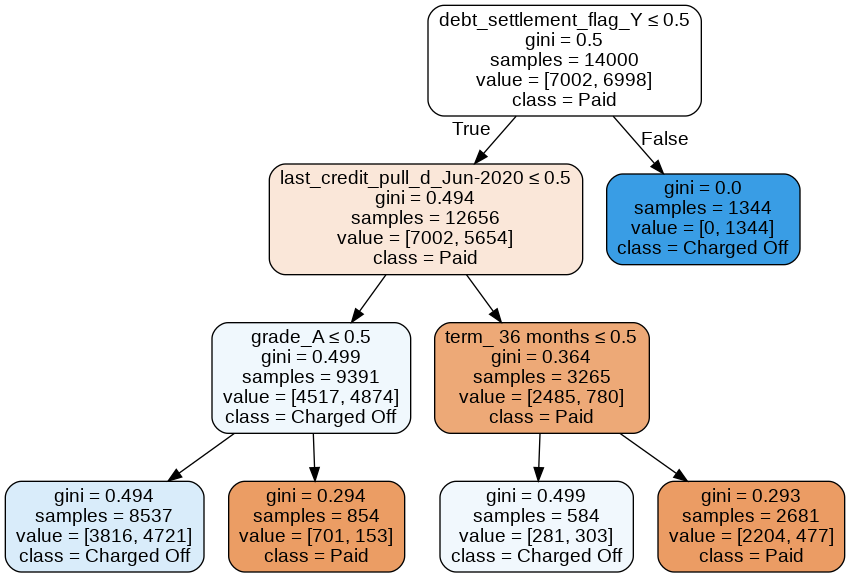

In [356]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns.values.tolist(), 
               class_names=['Paid', 'Charged Off'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [357]:
from sklearn.metrics import classification_report
pred_dt_binary = dt_model.predict(X_valid)
print(classification_report(y_valid, pred_dt_binary))

              precision    recall  f1-score   support

           0       0.81      0.40      0.54      2022
           1       0.60      0.91      0.72      1998

    accuracy                           0.65      4020
   macro avg       0.71      0.65      0.63      4020
weighted avg       0.71      0.65      0.63      4020



# Evaluating model

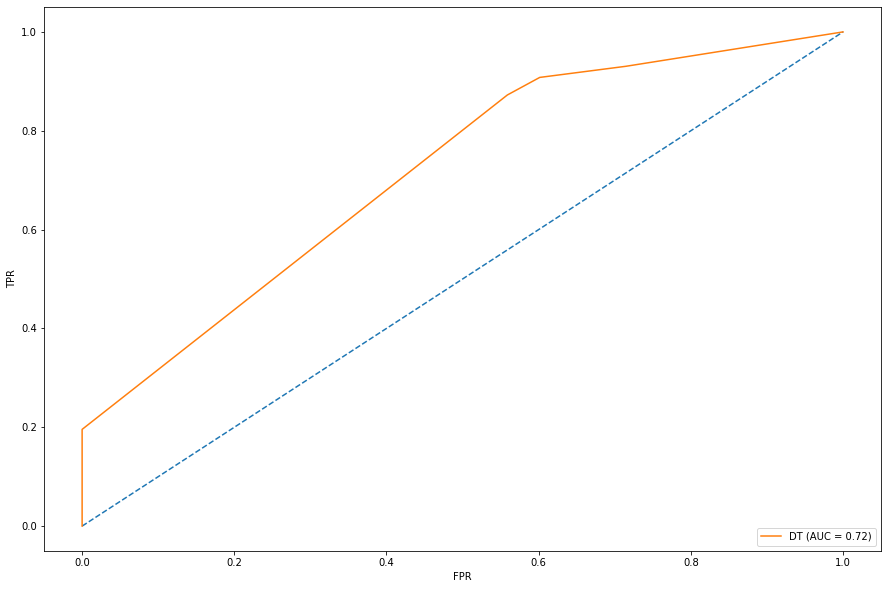

In [358]:
# calculate scores
auc_dt = roc_auc_score(y_valid, pred_dt)

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_valid, pred_dt)

plt.figure(figsize=(15, 10))
# plot horizontal line 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt, tpr_dt, label='DT (AUC = %0.2f)' % auc_dt)

# axis labels
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend(loc='lower right')
# show the plot
plt.show()